# Graph Tutoriel

Ceci est un tutoriel inspiré de l'["Initiation à la théorie des graphes" de Christian Roux, coll.Ellipses, 2009](http://www.sudoc.abes.fr/DB=2.1/SRCH?IKT=12&TRM=131948466)
qui présente les principaux points mathématique de la théorie des graphes et son utilisation en Python
à travers la librairie [Networkx](https://networkx.github.io/documentation/latest/reference/citing.html).


## Introduction 
mixte à la théorie des graphes et à la construction de grapĥ en python

Theorie

## Quelques définitions 
Un **graphe** est un ensemble de points reliés par des segments.

Les points sont appelés **sommets** ou **noeuds** du graphe. Nous les appelerons ici et tout au long de ce tutoriel les **noeuds** (nodes). 

Les segments sont les **arêtes** ou les liens du graphe (edge). Nous les appelerons liens tout au long du tutoriel bien que ce ne soit pas la dénomination mathématiques

Les somments situés à chaque bout sont les **extrémités** de l'arête.

    

![Graph simple](./simple_graph.png)

## Creation d'un graphe en python

In [7]:
#importer les libraires
#pour afficher
import matplotlib.pyplot as plt
#pour le calcul
import numpy as np
#pour le réseau
import networkx as nx
%matplotlib inline


In [8]:
#instancier le graph
g = nx.Graph()
#ajouter un noeud
#g.add_node("paul")
#ajouter une liste de noeud
g.add_nodes_from(["paul", "matthieu", "jean", "luc", "marc"])

In [9]:
#ajouter un lien (edge)
#g.add_edge("paul","matthieu")
#ajouter une liste de liens (edges)
g.add_edges_from([("paul", "matthieu"), ("matthieu", "jean"),("jean", "marc"), ("marc", "luc"), ("luc", "matthieu")])

In [10]:
#Combien de noeuds?
print "Ce graphe compte", g.number_of_nodes(), "noeuds:"
print(g.nodes())
#Combiens de liens?
print "Ce graphe compte", g.number_of_edges(), "liens"
print(g.edges())

Ce graphe compte 5 noeuds:
['jean', 'paul', 'luc', 'matthieu', 'marc']
Ce graphe compte 5 liens
[('jean', 'matthieu'), ('jean', 'marc'), ('paul', 'matthieu'), ('luc', 'matthieu'), ('luc', 'marc')]


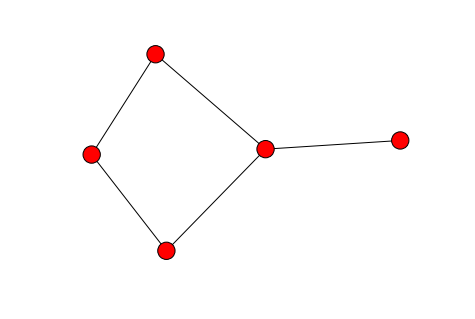

In [11]:
#Affichons ce graphe
#un simple graph
nx.draw(g)
plt.savefig("graphe_apotres.png") # save as png
plt.show() # display

    La position des sommets et des arêtes n'a pas d'importance d'un point de vue mathématiques. 
    Il s'agit d'une simple représentation graphique qui positionne les points de manière aléatoire.
    
    

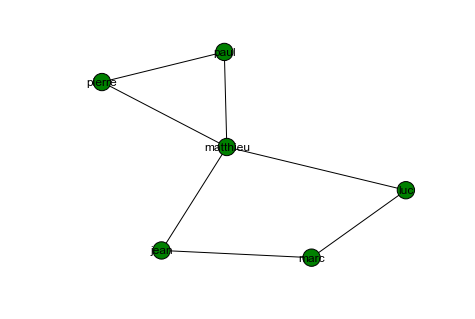

In [12]:
#Ajoutons un noeud
g.add_node("pierre", name="pierre")
#et ses relations
g.add_edges_from([("pierre", "matthieu"), ("paul", "pierre")])
#si le positionnement est aléatoire en mathématique en python 
#il faut définir l'agencement du graphe
#par défault networkx propose spring_layout
pos=nx.spring_layout(g)
nx.draw(g,pos, node_color="g",with_labels=True)


On peut rassembler les données du graphe dans un tableau, une **matrice**. 

De même qu'une matrice peut se représenter sous forme d'un graphe  que nous verrons plus loin

Ici nous avons nommé les noeuds pour plus de clareté. 

Nous allons maintenant représenter ce graphe sous forme de tableau ou de matrice où
* 1 représente la présence d'un lien entre deux noeuds 
* et 0 l'absence de lien entre les deux noeuds


|         | Marc  	| Pierre  	|  Matthieu |  Luc 	|  Jean | Paul |
|:-:	  |--	    |---	    |---	    |---	|---	|---   |
|Marc     |   0     |   0  	    |   0       |1      |1      |  0   |
|Pierre   |   0	    |   0 	    |   1  	    |   0	|   0   |  1   |
|Matthieu |   0	    |   1	    |   0	    |   1	|   1   |  1   |
|Luc      |   1	    |   0       |   0	    |   1   |   0   |  0   |
|Jean     |   1  	|   0   	|   0	    |   1	|   0	|  0   |
|Paul     |   0	    |   1	    |   1	    |   0	|   0	|   0  |  

Regardons maintenant comment produire ce même tableau en Python

Nous avons en effet déjà dans notre graphe la liste des noeuds, et la liste des liens.
Il suffit simplement de lister tous les couples de noeuds unique possible
et de détecter les liens qui existent déjà. 
Le nombre de liens possibles entre les noeuds peut ici se calculer facilement, 
il s'agit d'une simple opération d'algébre combinatoire qu'on appelle un [coefficient binominal](https://fr.wikipedia.org/wiki/Coefficient_binomial#.C3.89tablissement_de_la_formule)
qui consiste à calculer dans une liste d'élement k le nombre de combinaison n.
Soit en une barbare notation mathématique:


In [13]:
%%latex

$C_n^k = \frac{!n}{ n!(n-k)!}$ 

<IPython.core.display.Latex object>

En python, les combinaisons sont générés grace à la fonction combinations qui produit a partir d'une liste k
et d'un nombre n de combinaisons la liste complète des élements combinés (et non permutés). Nous avons besoins de la liste.

In [14]:
from itertools import combinations
matrix = sorted([n for n in combinations(g.nodes(),2)])

print len(matrix), "liens possibles:"
for n in matrix:
    print "-", n[0],"&",n[1]


15 liens possibles:
- jean & paul
- luc & jean
- luc & paul
- marc & jean
- marc & luc
- marc & matthieu
- marc & paul
- marc & pierre
- matthieu & jean
- matthieu & luc
- matthieu & paul
- pierre & jean
- pierre & luc
- pierre & matthieu
- pierre & paul


Maintenant pour reproduire le tableau, nous allons pour chaque possibilite de lien vérifier que celui-ci existe:
    * s'il existe on lui ajoute 1
    * sinon on ajoute 0
Plutot simple

In [15]:
matrix_0 = []
for n in matrix:
    if n in g.edges():
        matrix_0.append(n + (1,))
    else:
        matrix_0.append(n + (0,))

print matrix_0

[('jean', 'paul', 0), ('luc', 'jean', 0), ('luc', 'paul', 0), ('marc', 'jean', 1), ('marc', 'luc', 1), ('marc', 'matthieu', 0), ('marc', 'paul', 0), ('marc', 'pierre', 0), ('matthieu', 'jean', 1), ('matthieu', 'luc', 1), ('matthieu', 'paul', 1), ('pierre', 'jean', 0), ('pierre', 'luc', 0), ('pierre', 'matthieu', 1), ('pierre', 'paul', 1)]


In [16]:
for n in matrix_0:
    print n

('jean', 'paul', 0)
('luc', 'jean', 0)
('luc', 'paul', 0)
('marc', 'jean', 1)
('marc', 'luc', 1)
('marc', 'matthieu', 0)
('marc', 'paul', 0)
('marc', 'pierre', 0)
('matthieu', 'jean', 1)
('matthieu', 'luc', 1)
('matthieu', 'paul', 1)
('pierre', 'jean', 0)
('pierre', 'luc', 0)
('pierre', 'matthieu', 1)
('pierre', 'paul', 1)


In [48]:
#et les voisins soit les noeuds proches du noued selectionné
print(g.neighbors("paul"))
print(g.neighbors("matthieu"))

['matthieu']
['paul', 'luc', 'jean']


In [17]:
#On peut enlever des noeuds ou détruire des liens de la même ma,ière que lorsqu'on les ajoute

#g.remove_node("jean")
print(g.add_nodes_from(""

['paul', 'luc', 'matthieu', 'marc']


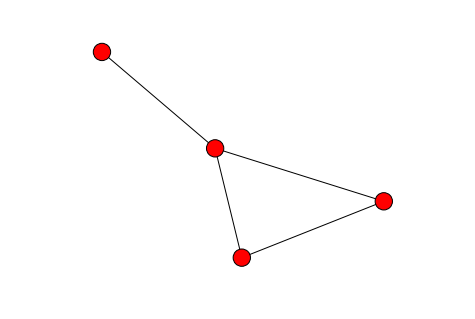

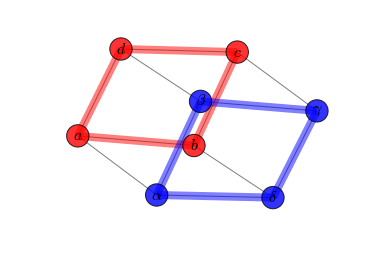

In [50]:
import networkx as nx

G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[4,5,6,7],
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,
                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
                       width=8,alpha=0.5,edge_color='b')


# some math labels
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(G,pos,labels,font_size=16)

plt.axis('off')
plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

In [ ]:
## Du graphe à la matrice
